# Hi, I am Darshan S.
### Machine Learning Intern at Bharat Intern

> ### *I recommend Bharat Intern. Check it out at:*
```
https://bharatintern.live/
```

# **Task 1: Housing Price Prediction**
### Problem Description is as follows:
```
Build a housing price prediction model that can overcome
the strong multicollinearity that this dataset holds and
predict the sales with respect to a single or multiple features
as selected by the user (input received from user) along with the
functionality of generating R2, RMSE scores of the model's operation.
```
### Structure of Dataset:
```
Dataset is a file data.csv in CSV format with column labels namely:
```

> ```price```: *Contains the price of a house.*

> ```area```: *numeric value in sq. ft. units.*

> ```bedrooms```: *numeric value indicating number of bedrooms in the house.*

> ```bathrooms```: *number of bathrooms in the house.*

> ```stories```: *Number of stories the complete house spans.*

> ```mainroad```: *boolean yes or no indicating if the house is connected to a main road.*

> ```guestroom```: *boolean value yes or no indicating whether the house includes guest room or not.*

> ```basement```: *boolean value yes or no indicating whether the house includes basement area or not.*

> ```hotwaterheating```: *boolean value yes or no indicating whether the house includes hot water heating facility or not.*

> ```airconditioning```: *boolean value yes or no indicating whether the house includes air conditioning or not.*

> ```parking```: *indicating the number of cars can be parked in the parking area present.*

> ```prefarea```: *boolean value indicating the house includes a prefarea.*

> ```furnishingstatus```: *indicating the furnishing status of the house - furnished, semi-furnished or unfurnished.*



In [14]:
# Import necessary libraries
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [15]:
# Load the dataset
file_path = 'data.csv'
data = pandas.read_csv(file_path)

# Display the available features to the user
print("Available Features:")
print("\n".join(data.columns))

Available Features:
price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


Enter the features you want to use for prediction (comma-separated): bedrooms,guestroom
R2 Score: 0.1512510022111574
RMSE: 2071246.3472149146


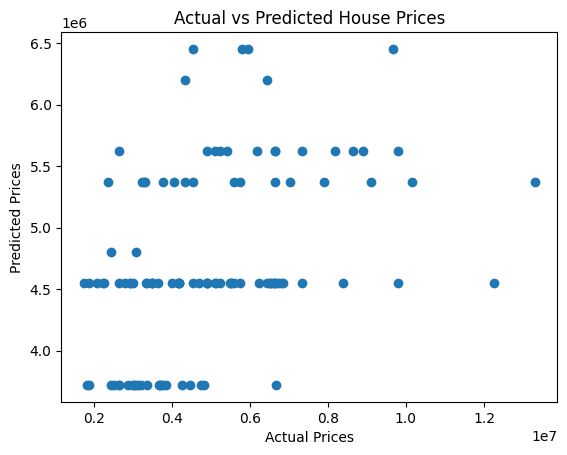

In [16]:
# Preprocessing: Convert boolean values to 0 and 1
bool_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[bool_cols] = data[bool_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert furnishingstatus to numerical using one-hot encoding
data = pandas.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Let the user choose features
selected_features = input("Enter the features you want to use for prediction (comma-separated): ")
selected_features = selected_features.split(',')

# Define X (features) and y (target)
X = data[selected_features]
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display R2 and RMSE scores
print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
